# <span style="color:teal;">CIS 211 Project 4:  Orbits</span>

##### Due 11:00 P.M. April 28, 2017

##### Reading:  M&R 10.6.3

###  <span style="color:teal">Vector and Body Classes</span>

This week's project will build on the Vector and Body classes from last week in order to create a complete simulation of the Solar System.  There are two ways to define these classes:  (1) copy your definitions from last week's project, or (2) download the instructor's solution from Canvas.

Instructions for both methods are in the next two sections.  **Use either of these methods, but not both.**  

Note: you will earn **extra credit points** if you use your own code.

####  <span style="color:teal">Option 1: &nbsp; Use Your Own Classes</span>

Choose this method only if your classes passed all the unit tests. Copy the complete Vector and Body class definitions from last week's notebook and paste them into the code cells below.  

####  <span style="color:teal">Option 2: &nbsp; Download the Instructor's Solution from Canvas </span>

If your classes did not pass all the unit tests you need to download a  "compiled Python" (`.pyc`) file from the Files section on Canvas.

The file you need has a name that ends with `cpython-3x.pyc` where `x` is either 4 (for Python 3.4), 5 (for Python 3.5), or 6 (for Python 3.6). To see which version of Python you have, select About from Jupyter's Help menu.
It does not matter which OS you have, the `.pyc` files work for Mac, Windows, or Linux

Download one of the `Body.cpython-3x.pyc` files, rename it `Body.pyc`, and move it to the same folder as this notebook.  Then uncomment and execute the `import` command in the code cell below.

In [2]:
from Body import *

###  <span style="color:teal">Libraries</span>

Execute the following code cell each time you open this notebook.

In [3]:
from copy import deepcopy
import matplotlib.pyplot as plt

%matplotlib inline

###  <span style="color:teal">Part 1: Planet Class (20 Points)</span>

Use the code cell below to define a new class named Planet.  Define the class so that a Planet is a kind of Body, _i.e._ the Planet class is a descendant of the Body class.

The Planet class should extend the Body class by adding two new attributes:
* the name of the planet
* the color that will be used when the planet is displayed in the GUI

Both the name and the color are strings that can be passed to the constructor when the object is created, along with any of the attributes that can be used to initialize a Body object.  For example:
```
>>> p = Planet(mass=5.9736E+24, name='earth', color='blue')
```
If no name or color is specified initialize those attributes to empty strings.

**Hint:** &nbsp; The examples in the lecture notes for Apr 24--28 show how to add named arguments to the constructor for a derived class.

The Planet class should also include two new "getter" methods that return the name and color of a planet.  Using the object created in the example above:
```
>>> p.name()
'earth'

>>> p.color()
'blue'
```

**Style Points:** &nbsp;  The main goal for writing a derived class is to reuse as much of the parent class as possible.  We'll deduct points for statements included in the Planet class that duplicate operations already implemeneted in the Body class.

##### <span style="color:red">Code:</span>

In [4]:
class Planet(Body):
    "Defines a planet in our solar system simulation. The same as a Body class, but with the addition of color and name."
    def __init__(self, mass = 0, position = Vector(0,0,0), velocity = Vector(0,0,0), name = '', color = ''):
        '''
        mass, position, velocity, and force are the same as in a Body class. Additionally defines color and name.
        
        :param name str: Name of the planet.
        :param color str: Color of the planet.
        :rtype: None
        '''
        Body.__init__(self, mass, position, velocity)
        self._color = color
        self._name = name
    
    def name(self):
        '''
        Returns the name of the planet.
        
        :return: Name of planet.
        :rtype: str
        '''
        return self._name
    
    def color(self):
        '''
        Returns the color of the planet.
        
        :return: Color of planet.
        :rtype: str
        '''
        return self._color

##### <span style="color:red">Tests:</span>

Use the following code cell as a "sandbox" if you want to do your own tests.  You can add additional cells here if you want.

##### <span style="color:red">Autograder Tests:</span>

In [22]:
# Test 1:  Call the constructor with default values.
p0 = Planet()
assert p0.name() == ''
assert p0.color() == ''
assert p0.mass() == 0.0

In [23]:
# Test 2:  Make an object that will represent Earth in the simulation
earth_loc = Vector(-2.700743E+10,1.446007E+11,9686451)
earth_dir = Vector(-29770.44,-5568.042,0.3961261)

earth = Planet(mass=5.9736E+24, position=earth_loc, velocity=earth_dir, name='earth', color='blue')
assert 5.973E+24 < earth.mass() < 5.974E+24
assert earth.name() == 'earth'
assert earth.color() == 'blue'

In [24]:
# Test 3: Verify the Planet class inherits force calculations
sun = Body(1.9891E+30, Vector(0,0,0), Vector(0,0,0))
earth = Planet(5.9736E+24, Vector(-2.700743E+10,1.446007E+11,9686451), Vector(-29770.44,-5568.042,0.3961261))

assert earth.force() == Vector(0,0,0)

earth.add_force(sun)
earth.move(86400)

assert -2.97e+10 < earth.position().x() < -2.95e+10
assert 1.43e+11 < earth.position().y() < 1.45e+11

##### <span style="color:red">Documentation:</span>

A planet is a Body class with the addition of a name and a color. 

The __init__() function acts the same as a body with all of its appropriate parameters, and then assigns internal values to name and color. name and color both default to ''. In order to work with the plot_orbits() function, the color needs to be submitted in hexidecimal. 

name() returns the name of the planet.

color() returns the name of the planet. 

###  <span style="color:teal">Part 2: &nbsp; Solar System Simulation (30 points)</span>

Execute this code cell to create a list of objects for the sun and the 9 planets.  The positions and initial velocities are from a "snapshot" of the solar system from January 1, 1970.

**Do not change this cell.** &nbsp; The autograder will use these objects to test your simulation.

In [5]:
solar_system = [
    Body(1.9891E+30,    Vector(0,0,0), Vector(0,0,0)),
    Planet(3.302E+23,   Vector(3.83713E+10,2.877025E+10,-1.175808E+09),    Vector(-38787.67,41093.05,6918.461),    name='mercury',  color='#ffcc66'),
    Planet(4.8685E+24,  Vector(-5.377313E+09,-1.085956E+11,-1.164748E+09), Vector(34741.48,-1865.747,-2031.506),   name='venus',    color='#800080'),
    Planet(5.9736E+24,  Vector(-2.700743E+10,1.446007E+11,9686451),        Vector(-29770.44,-5568.042,0.3961261),  name='earth',    color='#0000ff'),
    Planet(6.4185E+23,  Vector(1.983825E+11,7.422924E+10,-3.334841E+09),   Vector(-7557.626,24761.27,704.7457),    name='mars',     color='#ff0000'),
    Planet(1.89813E+27, Vector(-7.496502E+11,-3.201711E+11,1.811155E+10),  Vector(4982.522,-11417.83,-64.66531),   name='jupiter',  color='#ffffbf'),
    Planet(5.68319E+26, Vector(1.082806E+12,8.510841E+11,-5.793461E+10),   Vector(-6487.118,7565.952,125.4422),    name='saturn',   color='#0080ff'),
    Planet(8.68103E+25, Vector(-2.724616E+12,-2.894003E+11,3.428801E+10),  Vector(671.3469,-7099.093,-35.04028),   name='uranus',   color='#008080'),
    Planet(1.0241E+26,  Vector(-2.328072E+12,-3.891086E+12,1.337436E+11),  Vector(4633.961,-2767.423,-49.57268),   name='neptune',  color='#004080'),
    Planet(1.314E+22,   Vector(-4.551135E+12,3.175277E+11,1.282177E+12),   Vector(635.998,-5762.115,440.8821),     name='pluto',    color='#dddddd')
]

To run the full N-body simulation we need to calculate all pairwise interactions between the bodies.  On each time step, first update each body's force vector:
```
for i = 0 to n-1:
  for j = 0 to n-1:
    if i != j:
      add the force of body j to body i's force vector
```
Now uses the accumulated forces to move each body and clear the force vector so it's ready for the next time step:
```
for i = 0 to n-1:
   move body i
   clear forces on body i
```

Fill in the body of the function named `step_system`.  The arguments to this function are
* a list of Body objects (and since Planets are derived from Body the list can include them, too)
* a time step size (default 86459, the number of seconds in 1/365 of a year)
* the number of time steps to simulate (default 1)

The return value should be a list of orbits.  If there are $n$ bodies passed to the function, the output will be a list of $n$ sequences containing the $(x,y)$ coordinates of each body at each time step.

For example, to simulate one year of the solar system, using the list of Body object defined above:
```
orbits = step_system(solar_system, nsteps=365)
```
The output will be a list of 10 lists:
```
[ 
  [(sx0,sy0), (sx1,sy1), (sx2,sy2), ...],
  [(mx0,my0), (mx1,my1), (mx2,my2), ...],
  ...
  [(px0,py0), (px1,py1), (px2,py2), ...]
]
```
where `sx` and `sy` are the $x$ and $y$ coordinates of the first body (the Sun), `mx` and `my` are the coordinates of the second body (Mercury), _etc_.

**Note** &nbsp; Each time you call your `step_system` function it's going to change the position vectors in the Body objects.  To make sure you have a "clean copy" each time you test your code either go back and re-execute the cell that defines the solar system or make a copy of the solar system to use in your test:
```
ss = deepcopy(solar_system)
```

In [6]:
def step_system(bodies, dt=86459, nsteps=1):
    '''
    Takes a list of bodies and returns how far they move after nsteps number of time steps.
    
    :param bodies list: List of bodies with positions, masses, and vectors.
    :param dt float: The time step. Defaults to 86459.
    :param nsteps int: The number of time steps we are taking. Defaults to 1. 
    :return: List of lists of positions at each step of the simulation.
    :rtype: list of lists.
    '''
    n = len(bodies)
    # Creates n many empty lists inside a list that we can put our information into. 
    orbit = [[] for k in range(n)]
    for l in range(nsteps):
        for i in range(n):
            for j in range(n):
                if i != j:
                    bodies[i].add_force(bodies[j])
            bodies[i].move(dt)
            bodies[i].clear_force()
            orbit[i].append(bodies[i].position())
    return orbit

##### <span style="color:red">Tests:</span>

Use the following code cell as a "sandbox" if you want to do your own tests.  You can add additional cells here if you want.

##### <span style="color:red">Autograder Tests:</span>

Test 1:  Run the simulation for 5 time steps.  The return value should be a list of 10 orbits, and each orbit should have 5 pairs.

In [20]:
ss = deepcopy(solar_system)
orbits = step_system(ss, nsteps=5, dt=86400)

assert isinstance(orbits,list)
assert len(orbits) == 10
assert sum([len(x) for x in orbits]) == 50

Test 2:  Run the simulation long enough for Mercury to make one full orbit (about 88 Earth days), see if it's close to where it started.

In [21]:
ss = deepcopy(solar_system)
start = deepcopy(ss[1].position())            # Mercury's starting position
step_system(ss, nsteps=1000, dt=7600.5216)
stop = ss[1].position()                       # Mercury's final position

assert (stop-start).norm() < 1e10

##### <span style="color:red">Documentation:</span>

Takes a list of bodies/planets and returns a list of lists containing positions for each body over each time step.

n = len(bodies) is done simply for ease of reading.
orbit then creates n many empty lists inside the entire list that the orbit information will be placed inside of.

Then: 

1) We take (nx1)x(nx1) add_force calculations for each interaction a body has will all of the other bodies.

2) After all (nx1)^2 steps we use move() for each body, clear the force vectors for each body, and then append the position of each body to the appropriate list in orbit. 

3) Parts 1) and 2) are repeated (nsteps) number of times.

Then the function returns the list of lists (orbit). 

###  <span style="color:teal">Part 3: &nbsp; Draw Concentric Circles (20 points)</span>

This part of the project is a "warmup exercise" to help you learn how to use PyPlot to draw orbits.

Fill in the body of the function definition below so it draws a set of concentric circles.  Each circle will actually be a sequence of connected line segments drawn by a call to the `plot` function.  The parameters are:
* the number of circles to draw
* the radius of the innermost circle
* the radius of the outermost circle
* the number of line segments in each circle

Use the radius of the inner and outer circles to compute equally spaces between the other circles.  For example, if the call is
```
>>> concentric(ncircles=5, inner=5, outer=9)
```
the function should draw circles with radius 5, 6, 7, 8, and 9.

####  <span style="color:teal">Hint </span>

For a circle with radius $r$ the $(x,y)$ coordinates of the point at  angle $\alpha$ are $x = r \cos \alpha$ and $y = r \sin \alpha$.

![circle](http://pages.uoregon.edu/conery/CIS211/Orbits/circle.png)

The following expressions will create lists of $x$ and $y$ coordinates for $n$ equally spaced points around the perimeter of a circle with radius 1.  When $n =6$ there will be 6 line segments, _i.e._ the "circle" will actually be a hexagon.

In [7]:
from math import pi as π, sin, cos

In [9]:
n = 8
r = 2
x = [ r* cos(2*π*i/n) for i in range(n+1) ]
y = [ r* sin(2*π*i/n) for i in range(n+1) ]

**Note:** &nbsp; These lists have $n+1$ values so the last line segment "completes the circle" and connects back to the starting point.

To complete this project you need to do two things:
* adapt the expressions shown above to make circles with the correct radius
* figure out how to pass the list of $x$ and $y$ coordinates to `plot` so it draws the circles

##### <span style="color:red">Code:</span>

In [8]:
def concentric(ncircles=3, inner=1, outer=2, nsegs=30):
    '''
    Draws equally spaced concentric shapes. 
    
    :param ncircles int: Number of shapes that are going to be drawn. 
    :param inner float: Radius of the innermost shape.
    :param outer float: Radius of the outermost shape. 
    :param nsegs int: Number of sides of the shape that is being drawn. 
    :return: None
    :rtype: None
    '''
    radii = [inner + (outer - inner) * i / (ncircles - 1) for i in range(ncircles)]
    for radius in radii:
        x = [radius * cos(2*π*k/nsegs) for k in range(nsegs + 1)]
        y = [radius * sin(2*π*k/nsegs) for k in range(nsegs + 1)]
        plt.plot(x, y)
    plt.axes().set_aspect('equal')

##### <span style="color:red">Tests:</span>

Use the following code cell as a "sandbox" if you want to do your own tests.  You can add additional cells here if you want.

##### <span style="color:red">Autograder Tests:</span>

The autograder cells use a different strategy for this part of the project.  The autograder will just make sure your function does not crash.  The human grader will look at the drawing to assign points for correctness.

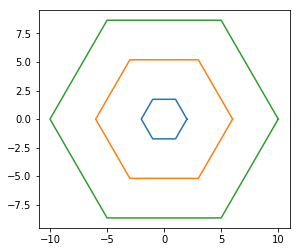

In [10]:
concentric(ncircles=3, inner=2, outer=10, nsegs=6)

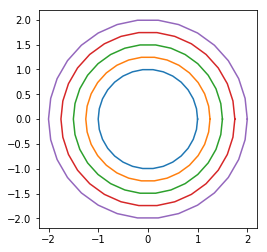

In [11]:
concentric(ncircles=5)

##### <span style="color:red">Documentation:</span>

concentric() draws concentric shapes, but with large nsegs, the shape approximates a circle. 

radii uses list comprehension to list all of the radii such that all of the concentric shapes are equally spaced and the inner and outer radii are the same as what is requested.

For each radius in the radii list, we take our x component to be a list with components radius * cos(2π * (i / nsegs)) for i ranging from 0 to nsegs so that the shape is fully connected. Our y component is the same, but with sin instead of cos. 

We then call matplotlib.pyplot (which was renamed to plt in the import statement) to plot our x and y with lines connecting adjacent points for each radius in radii. 

We use plt.axes().set_aspect('equal') to set the axes to equal length instead of the golden ratio so that the object looks like a circle at large enough nsegs. 

###  <span style="color:teal">Part 4: &nbsp; Plotting Orbits (30 points)</span>

Complete the definition of the `plot_orbits` function below.  The first four lines will run the simulation, using your `step_system` function, and figure out how many orbits to draw.  You need to fill in the rest:  extract the $x$ and $y$ coordinates from the list returned by `step_system` and plot the orbits.

**Note:** &nbsp; The simulation will use all 10 bodies in the solar system, but the number of orbits to show will be determined by the value passed as `nplanets`.

When you draw the orbits, you can pick one color and use it for all orbits, or let the library choose which colors to use.

For **extra credit** get each planet's color by calling the `color` method and pass that color string to the `plot` function when drawing the planet's orbit.  The Sun is a Body object and it does not have a color attribute so just use black for this orbit.

##### <span style="color:red">Code:</span>

In [31]:
def plot_orbits(bodies, ndays = 365, nplanets=None):
    '''
    Takes a list of bodies/planets and plots them their paths after ndays. Plots number of planets in nplanets, 
    unless nplanets is None, in which case it plots all the bodies.
    
    :param bodies list: List of bodies/planets with mass, position, velocity, and orbits.
    :param ndays int: The length of time over which the simulation will take place. Defaults to 365.
    :param nplanets int/None: Number of bodies that will be plotted. If nplanets == None, it will plot all bodies.
    :return: None
    :rtype: None
    '''
    bodies = deepcopy(bodies)
    orbits = step_system(bodies, nsteps=ndays)
    if nplanets is None:
        nplanets = len(bodies)
    for i in range(nplanets):
        for j in range(ndays):
            if type(bodies[i]) == Body:
                plt.plot(orbits[i][j].x(), orbits[i][j].y(), '.', color = '#000000')
            else:
                plt.plot(orbits[i][j].x(), orbits[i][j].y(), '.', color = bodies[i].color())
    plt.axes().set_aspect('equal')

##### <span style="color:red">Tests:</span>

Use the following code cell as a "sandbox" if you want to do your own tests.  You can add additional cells here if you want.

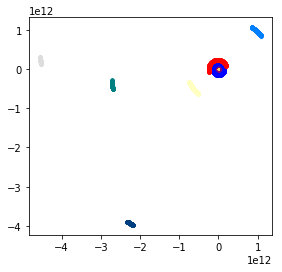

In [33]:
thing = []
for i in solar_system:
    thing.append(type(i) == Body)
thing

plot_orbits(solar_system)

##### <span style="color:red">Autograder Tests:</span>

The autograder will call your `plot_orbits` function, the human grader will assign points based on the plot.

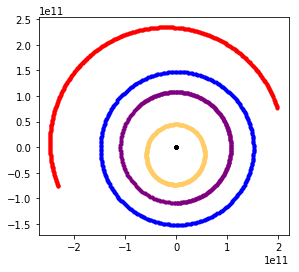

In [26]:
plot_orbits(solar_system, nplanets=5)

##### <span style="color:red">Documentation:</span>

**Important** &nbsp; If you plot orbits using each planet's own color attribute include "Extra Credit" in your documentation and explain how you did it.

plot_orbit takes a list of bodies/planets, deep copies the list of bodies that we are using and uses that in the function so that we do not affect the original list. We then get a list of orbits using the step_system function with the deep copied list and ndays representing nsteps. 

Then, if nplanets is None, we reassign nplanets to be len(bodies). Essentially, this makes our default value for the number of bodies that we want to plot equal to the number of bodies that we have.

Then for every position in orbit we plot a single point corresponding to that position by using plt.plot(). This is then done for the first (nplanets) bodies. We use ',' to make the dots we are plotting smaller for ease of visuals. After every day and every body has been plotted, we use plt.axes().set_aspect('equal') to make the axes square instead of rectangular.

Extra Credit: Before plotting each point, we check to see if the type of the body we are working with is a Body. If it is a body (i.e. it does not have a color assigned to it), we plot its points in black by putting color = '#000000' in the parameters of plt.plot(). If it is not a body, then we set color = bodies[i].color(), using the color function in the planet class to call the color that it has been assigned. 